# Weber Eq. Example in Lopez 2022

In [1]:
import sys
sys.path.append('../MGO')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl
import sympy as sp
from IPython.display import display

In [2]:
rcParams.update(mpl.rcParamsDefault)
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

## Testing symbolic expressions

In [40]:
t, E, k, x = sp.symbols('t E k x')
# x = sp.symbols('x', nonzero=True)
E = sp.symbols('E', positive=True)
R = sp.symbols('R', positive=True)
sigma_t = sp.symbols('sigma_t')

In [41]:
D = k**2 + x**2 - 2*E
D

-2*E + k**2 + x**2

In [42]:
sp.diff(D, k)

2*k

In [43]:
- sp.diff(D, x)

-2*x

### Computing $\mathcal{N}_t$

In [44]:
I = sp.integrate(sp.sin(2*t)**2)
I

t/2 - sin(2*t)*cos(2*t)/4

In [45]:
sp.simplify(I)

t/2 - sin(4*t)/8

In [46]:
# alternatively
I.equals(t/2 - sp.sin(4*t)/8)

True

In [47]:
# sigma_t = sp.exp(-sp.I * sp.floor((4*t+sp.pi)/(4*sp.pi)) * sp.pi)

In [48]:
N_t = sigma_t * sp.exp(sp.I * (t*(R**2)) - sp.I * (R**2)/4 * sp.sin(4*t)) / (sp.sqrt(-2*sp.pi*sp.I) * sp.sqrt(- 2*R*sp.cos(2*t)))
sp.simplify(N_t)

sigma_t*exp(I*R**2*(t - sin(4*t)/4))/(2*sqrt(pi)*sqrt(R)*sqrt(-I)*sqrt(-cos(2*t)))

### $B_t$, phase convention and $\sigma_t$

In [49]:
B_t = -sp.cos(2*t)

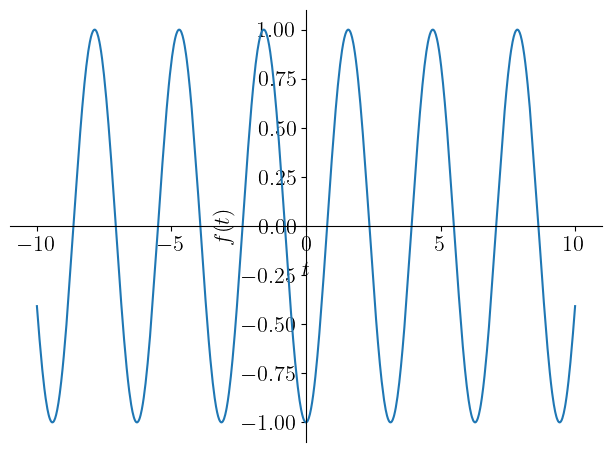

In [50]:
sp.plot(B_t)

In [51]:
B_t_np = sp.lambdify(t, B_t)

/Users/rune.hoejlund/opt/anaconda3/envs/ray-tracer/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


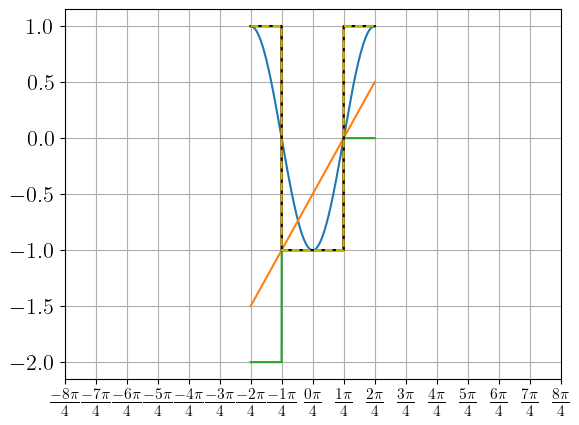

In [52]:
t_np = np.linspace(-2*np.pi/4, 2*np.pi/4, 1000)
plt.plot(t_np, B_t_np(t_np))
plt.plot(t_np, (4*t_np-np.pi)/(2*np.pi))
plt.plot(t_np, np.floor((4*t_np-np.pi)/(2*np.pi)))
plt.plot(t_np, np.exp(1j*np.floor((4*t_np-np.pi)/(2*np.pi))*np.pi), '-')
plt.plot(t_np, np.exp(-1j*np.floor((4*t_np-np.pi)/(2*np.pi))*np.pi), 'k-')
plt.plot(t_np, np.sign(B_t_np(t_np)), 'y--')
plt.xticks(np.arange(-8, 9)*np.pi/4, [r'$\frac{' + str(i) + ' \pi}{4}$' for i in np.arange(-8, 9)])
plt.grid()
plt.show()

In [53]:
# # plt.plot(t_np, np.floor((4*t_np - np.pi)/(2*np.pi)) * np.pi) # phase of B_t
# # plt.plot(t_np, -np.floor((4*t_np + np.pi)/(4*np.pi)) * np.pi) # sigma_t
# plt.plot(t_np, (
#     (-np.floor((4*t_np + np.pi)/(4*np.pi)) * np.pi)
#     - np.floor((4*t_np - np.pi)/(2*np.pi)) * np.pi/2
#          )) # sigma_t - (phase of B_t)/2

### Computing $\Upsilon_t$

In [54]:
t, tau = sp.symbols('t tau')
R = sp.symbols('R', positive=True)

In [55]:
A_t = -sp.sin(2*t)
B_t = -sp.cos(2*t)
S_t = sp.Matrix([[A_t, B_t], [-B_t, A_t]])
z_tau = R*sp.Matrix([[sp.cos(2*tau)], [-sp.sin(2*tau)]])
display(S_t, z_tau)

Matrix([
[-sin(2*t), -cos(2*t)],
[ cos(2*t), -sin(2*t)]])

Matrix([
[ R*cos(2*tau)],
[-R*sin(2*tau)]])

In [56]:
Z_t_tau = sp.simplify(S_t@z_tau)
X_t_tau = Z_t_tau[0]
K_t_tau = Z_t_tau[1]

display(Z_t_tau, X_t_tau, K_t_tau)

Matrix([
[-R*sin(2*t - 2*tau)],
[ R*cos(2*t - 2*tau)]])

-R*sin(2*t - 2*tau)

R*cos(2*t - 2*tau)

In [57]:
X_t = sp.symbols('X_t', real=True)
sp.Eq(X_t, X_t_tau)

Eq(X_t, -R*sin(2*t - 2*tau))

In [58]:
tau_X_t = sp.solve(sp.Eq(X_t, sp.simplify(Z_t_tau[0])),tau)[0]
tau_X_t

t + asin(X_t/R)/2

In [59]:
K_t_X_t = sp.simplify(Z_t_tau[1].subs(tau, tau_X_t))
K_t_X_t

sqrt(R**2 - X_t**2)

In [60]:
epsilon = sp.symbols('epsilon')
int_K_t = sp.integrate(K_t_X_t, X_t)
display(int_K_t)

R**2*asin(X_t/R)/2 + X_t*sqrt(R**2 - X_t**2)/2

In [61]:
Theta_t = sp.simplify(int_K_t.subs(X_t, X_t_tau.subs(t, tau) + epsilon) - int_K_t.subs(X_t, X_t_tau.subs(t, tau)))
Theta_t

R**2*asin(epsilon/R)/2 + epsilon*sqrt(R**2 - epsilon**2)/2

In [62]:
Theta_t.equals(epsilon/2 * sp.sqrt(R**2 - epsilon**2) + R**2/2 * sp.asin(epsilon/R))

True

In [63]:
J_X_t = 1/sp.diff(tau_X_t, X_t)
J_X_t

2*R*sqrt(1 - X_t**2/R**2)

In [64]:
Phi_t = sp.sqrt(J_X_t.subs(X_t, X_t_tau.subs(tau, t)) / J_X_t.subs(X_t, X_t_tau.subs(tau, t) + epsilon))
Phi_t

(1 - epsilon**2/R**2)**(-1/4)

In [65]:
print(
    Phi_t.equals(1/sp.root((1-(epsilon/R)**2),4)),
    Phi_t.equals((1-(epsilon/R)**2)**(-sp.Rational(1, 4)))
)

True True


In [66]:
Psi_t = Phi_t*sp.exp(sp.I*Theta_t)
Psi_t

exp(I*(R**2*asin(epsilon/R)/2 + epsilon*sqrt(R**2 - epsilon**2)/2))/(1 - epsilon**2/R**2)**(1/4)

In [67]:
K_t_tau.subs(tau, t)

R

In [68]:
MT_phase = -sp.Rational(1, 2) * sp.simplify(A_t/B_t) * epsilon**2 - K_t_tau.subs(tau, t) * epsilon

In [69]:
MT_phase

-R*epsilon - epsilon**2*tan(2*t)/2

In [70]:
str(MT_phase)

'-R*epsilon - epsilon**2*tan(2*t)/2'

In [71]:
str(Theta_t)

'R**2*asin(epsilon/R)/2 + epsilon*sqrt(R**2 - epsilon**2)/2'

In [72]:
f = Theta_t + MT_phase
ddf = sp.diff(sp.diff(f, epsilon), epsilon)

In [73]:
f

R**2*asin(epsilon/R)/2 - R*epsilon - epsilon**2*tan(2*t)/2 + epsilon*sqrt(R**2 - epsilon**2)/2

In [74]:
str(ddf)

'-epsilon**3/(2*(R**2 - epsilon**2)**(3/2)) - 3*epsilon/(2*sqrt(R**2 - epsilon**2)) - tan(2*t) + epsilon/(2*R*(1 - epsilon**2/R**2)**(3/2))'

In [75]:
sigma_t = sp.symbols('sigma_t')
N_t

sigma_t*exp(I*R**2*t - I*R**2*sin(4*t)/4)/(2*sqrt(pi)*sqrt(R)*sqrt(-I)*sqrt(-cos(2*t)))

In [76]:
str(N_t)

'sigma_t*exp(I*R**2*t - I*R**2*sin(4*t)/4)/(2*sqrt(pi)*sqrt(R)*sqrt(-I)*sqrt(-cos(2*t)))'

Use
$$
\cos(2 |t|) = x/R, \\[1em]
\sin(2 |t|) = \sqrt{1 - x^2/R^2}, \\[1em]
\tan(2 |t|) = \sqrt{R^2 - x^2} / x, \\[1em]
\sin(4 |t|) = 2 \sin(2|t|) \cos(2|t|) =  2 \sqrt{1 - x^2/R^2} \cdot x/R, \\[1em]
|t| = 1/2 \cos^{-1}(x/R), \\[1em]
\sigma_t / \sqrt{\text{sign} \, B_t} = \exp(i \pi/4 (\text{sign} \, x + 1)), \\[1em]
\sigma_t / \sqrt{- \cos(2 t)} = \exp(i \pi/4 (\text{sign} \, x + 1)) \frac{1}{\sqrt{|\cos(2 t)|}}
$$

In [83]:
N_t_m = sp.sympify('exp(- I*(R**2)*1/2*acos(x/R) + I*(R**2)*( 2 * x/R * sqrt(1 - x^2/R^2) )/4)/(2*sqrt(pi)*sqrt(R)*sqrt(-I)*sqrt(abs(x/R))) * exp(I * pi/4 * (sign(x) + 1))')
N_t_m

exp(I*pi*(sign(x) + 1)/4)*exp(-I*R**2*acos(x/R)/2 + I*R*x*sqrt(1 - x**2/R**2)/2)/(2*sqrt(pi)*sqrt(R)*sqrt(-I)*sqrt(Abs(x/R)))

In [84]:
N_t_p = sp.sympify('exp(I*(R**2)*1/2*acos(x/R) - I*(R**2)*( 2 * x/R * sqrt(1 - x^2/R^2) )/4)/(2*sqrt(pi)*sqrt(R)*sqrt(-I)*sqrt(abs(x/R))) * exp(I * pi/4 * (sign(x) + 1))')
N_t_p

exp(I*pi*(sign(x) + 1)/4)*exp(I*R**2*acos(x/R)/2 - I*R*x*sqrt(1 - x**2/R**2)/2)/(2*sqrt(pi)*sqrt(R)*sqrt(-I)*sqrt(Abs(x/R)))

In [88]:
display(Phi_t, Theta_t, MT_phase)

(1 - epsilon**2/R**2)**(-1/4)

R**2*asin(epsilon/R)/2 + epsilon*sqrt(R**2 - epsilon**2)/2

-R*epsilon - epsilon**2*tan(2*t)/2

In [93]:
f_approx = -sp.tan(2*t)/2 * (epsilon**2) - (epsilon**3/(6*R))
f_approx

-epsilon**2*tan(2*t)/2 - epsilon**3/(6*R)

In [103]:
f_approx = -sp.tan(2*t)/2 * (epsilon**2) - (epsilon**3/(6*R))
ddf_approx = sp.diff(f_approx, (epsilon, 2))
display(f_approx, ddf_approx)
str(ddf_approx)

-epsilon**2*tan(2*t)/2 - epsilon**3/(6*R)

-(tan(2*t) + epsilon/R)

'-(tan(2*t) + epsilon/R)'

## Plot Exact Solution

In [3]:
from scipy.special import airy

def Ai(x):
    ai, *_ = airy(x)
    return ai

def Bi(x):
    _, _, bi, _ = airy(x)
    return bi

In [127]:
def get_phase(z, branch_cut_dir=np.pi):
    phase = np.angle(z) % (2*np.pi)
    phase = (phase - branch_cut_dir) % (2*np.pi) + branch_cut_dir
    return phase
    
def sqrt_with_branch_cut(z, branch_cut_dir=np.pi, phase=None):
    amplitude = np.abs(z)
    if phase is None:
        phase = get_phase(z, branch_cut_dir=branch_cut_dir)
    return np.sqrt(amplitude)*np.exp(1j*(phase)/2)

nu = 0
E = nu + 1/2
R = np.sqrt(2*E)

xs_ex = lambda t: R * np.cos(2*t)
ks_ex = lambda t: - R * np.sin(2*t)

A_ex = lambda t: -np.sin(2*t)
# B_ex = lambda t: -np.cos(2*t)
B_phase = lambda t: np.pi * np.floor((4*t-np.pi)/(2*np.pi))

B_ex = lambda t: np.abs(np.cos(2*t)) * np.exp(1j*B_phase(t))
# B_ex = lambda t: np.abs(-np.cos(2*t)) * np.exp(1j * np.pi * np.floor((4*t-np.pi)/(2*np.pi)))
sigma_t_ex = lambda t: np.exp(-1j * np.pi * np.floor((4*t+np.pi)/(4*np.pi)))
# Nt_ex = lambda t: sigma_t_ex(t) * (np.exp(1j*t*(R**2) - 1j * ((R**2)/4) * np.sin(4*t))
#                     / (
#                         np.emath.sqrt(-1j*2*np.pi) * np.emath.sqrt(2*R*B_ex(t))
#                     ))

Nt_ex = lambda t: sigma_t_ex(t) * (np.exp(1j*t*(R**2) - 1j * ((R**2)/4) * np.sin(4*t))
                    / (
                        np.emath.sqrt(-1j*2*np.pi*2*R) * sqrt_with_branch_cut(B_ex(t), np.pi/2, phase=B_phase(t))
                    ))
# Nt_ex = lambda t: sigma_t_ex(t) * (np.exp(1j*t*(R**2) - 1j * ((R**2)/4) * np.sin(4*t))
#                  / (
#                      np.sqrt(2*R * 2*np.pi * np.abs(B_ex(t))) *
#                      np.exp((
#                          -1j*np.pi/2 + 1j * np.pi * np.floor((4*t-np.pi)/(2*np.pi))
#                          )/2)
#                  ))
# Nt_ex = lambda t: (np.exp(1j*t*(R**2) - 1j * ((R**2)/4) * np.sin(4*t) - 1j * np.floor((4*t+np.pi)/(4*np.pi))*np.pi )
#                  / (
#                      np.emath.sqrt(-1j*2*np.pi)
#                      * np.emath.sqrt(-2*R*np.cos(2*t))
#                  ))
s = lambda t: -np.sign(np.tan(2*t))
Upsilon_approx = lambda t: ( np.pi * (2*R)**(1/3)
                            * np.exp(-1j * (R**2)/3 * (np.tan(2*t))**3 )
                            * (
                                Ai(-(np.tan(2*t)**2)/4 * (2*R)**(4/3))
                                + 1j * s(t) *
                                Bi(-(np.tan(2*t)**2)/4 * (2*R)**(4/3))
                            )
                            )

In [156]:
sigma_t_p = lambda t: 1
Nt_p = lambda t: ( 1/(2 * np.sqrt(R)) * np.emath.sqrt( 1j/(np.pi * np.abs( np.cos(2*np.abs(t)) )) ) 
                  * np.exp(1j * np.pi/4 * ( 1 + np.sign(np.cos(2*np.abs(t))) ))
                  * sigma_t_p(t)
                  * np.exp(1j * np.abs(t) * (R**2) - 1j * (R**2)/4 * np.sin(4*np.abs(t)))
                  )

sigma_t_m = lambda t: np.exp(-1j * np.pi * (np.sign(np.cos(2*np.abs(t))) - 1)/2 )
Nt_m = lambda t: ( 1/(2 * np.sqrt(R)) * np.emath.sqrt( 1j/(np.pi * np.abs(np.cos(2*np.abs(t)))) ) 
                  * np.exp(1j * np.pi/4 * (1 + np.sign(np.cos(2*np.abs(t)))))
                  * sigma_t_m(t)
                  * np.exp(- 1j * np.abs(t) * (R**2) + 1j * (R**2)/4 * np.sin(4*np.abs(t)))
                  )

Nt_piecewise = lambda t: np.piecewise(t.astype(np.complex_), [t<0, t>= 0], [Nt_m, Nt_p])

sigma_t_piecewise = lambda t: np.piecewise(t.astype(np.complex_), [t<0, t>= 0], [sigma_t_m, sigma_t_p])

one_over_sgn_B = lambda t: np.exp(1j * np.pi/4 * ( 1 + np.sign(np.cos(2*np.abs(t))) ))

In [162]:
import finite_diff as fd
from scipy.integrate import cumulative_trapezoid

In [185]:
def continuous_angle(z, axis=0):
    z0 = np.take(z, 0, axis=axis)
    arg0 = np.angle(z0)
    return arg0 + np.cumsum(np.imag(np.diff(z, prepend=z0)/z))

def continuous_sqrt(z, axis=0):
    return np.sqrt(np.abs(z)) * np.exp(1j*continuous_angle(z)/2)

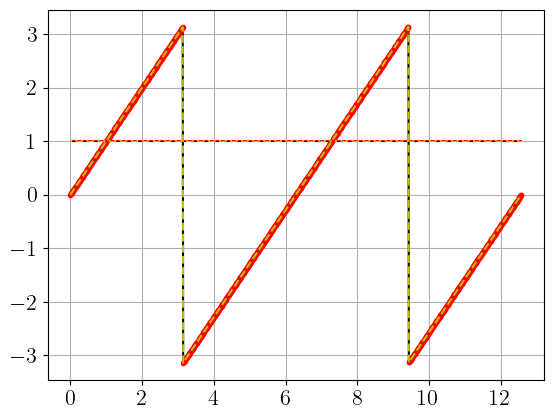

In [202]:
thetas = np.linspace(0, 4*np.pi, 1000)
z_vals = np.exp(1j*thetas)

# plt.plot(thetas, np.angle(z_vals), 'r.')
# plt.plot(thetas, continuous_angle(z_vals), 'y-')

# plt.plot(thetas, np.real(np.sqrt(z_vals)), 'r.')
# plt.plot(thetas, np.imag(np.sqrt(z_vals)), 'r,')
# plt.plot(thetas, np.real(continuous_sqrt(z_vals)), 'y--')
# plt.plot(thetas, np.imag(continuous_sqrt(z_vals)), 'y:')

plt.plot(thetas, np.angle(np.sqrt(z_vals)**2), 'k-')
plt.plot(thetas, np.abs(np.sqrt(z_vals)**2), 'k--')
plt.plot(thetas, np.angle(np.sqrt(z_vals)**2), 'r.')
plt.plot(thetas, np.abs(np.sqrt(z_vals)**2), 'r,')
plt.plot(thetas, np.angle(continuous_sqrt(z_vals)**2), 'y--')
plt.plot(thetas, np.abs(continuous_sqrt(z_vals)**2), 'y:')

plt.grid()

In [209]:
thetas

array([3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       3.14159265, 3.14159265, 3.14159265, 3.14159265, 3.14159265,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

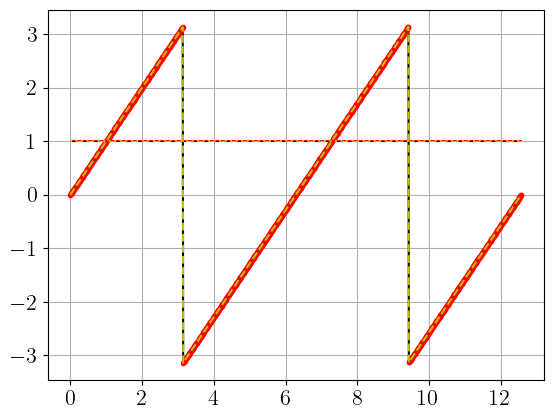

In [210]:
thetas = np.linspace(0, 4*np.pi, 1000)
z_vals = np.exp(1j*thetas)

# plt.plot(thetas, np.angle(z_vals), 'r.')
# plt.plot(thetas, continuous_angle(z_vals), 'y-')

# plt.plot(thetas, np.real(np.sqrt(z_vals)), 'r.')
# plt.plot(thetas, np.imag(np.sqrt(z_vals)), 'r,')
# plt.plot(thetas, np.real(continuous_sqrt(z_vals)), 'y--')
# plt.plot(thetas, np.imag(continuous_sqrt(z_vals)), 'y:')

plt.plot(thetas, np.angle(np.sqrt(z_vals)**2), 'k-')
plt.plot(thetas, np.abs(np.sqrt(z_vals)**2), 'k--')
plt.plot(thetas, np.angle(np.sqrt(z_vals)**2), 'r.')
plt.plot(thetas, np.abs(np.sqrt(z_vals)**2), 'r,')
plt.plot(thetas, np.angle(continuous_sqrt(z_vals)**2), 'y--')
plt.plot(thetas, np.abs(continuous_sqrt(z_vals)**2), 'y:')

plt.grid()

In [329]:
def continuous_angle_of_reals(x, axis=0):
    x0 = np.take(x, 0, axis=axis)
    sgn = np.sign(x)
    return np.angle(x) + 2*np.pi*np.cumsum(np.heaviside(np.diff(sgn, prepend=sgn[0]), 0))

def continuous_sqrt_of_reals(x, axis=0):
    return np.sqrt(np.abs(x)) * np.exp(1j*continuous_angle_of_reals(x)/2)

/Users/rune.hoejlund/opt/anaconda3/envs/ray-tracer/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


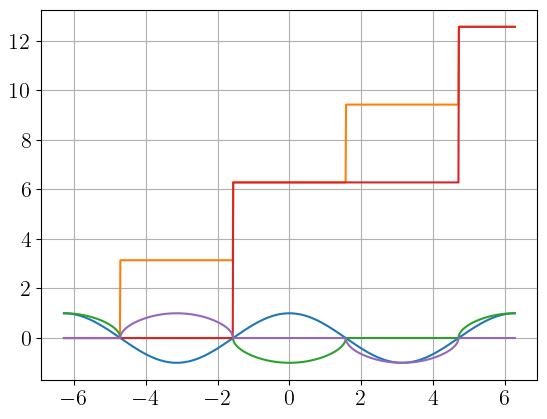

In [335]:
plt.plot(t_vals, z_vals)
plt.plot(t_vals, continuous_angle_of_reals(z_vals))
plt.plot(t_vals, continuous_sqrt_of_reals(z_vals))
sgn = np.sign(z_vals)
plt.plot(t_vals, 2*np.pi*np.cumsum(np.heaviside(np.diff(sgn, prepend=sgn[0]), 0)))
plt.plot(t_vals, np.imag(continuous_sqrt_of_reals(z_vals)))

# plt.plot(t_vals, np.abs(z_vals)*np.exp(1j*continuous_angle_of_reals(z_vals)))
plt.grid()

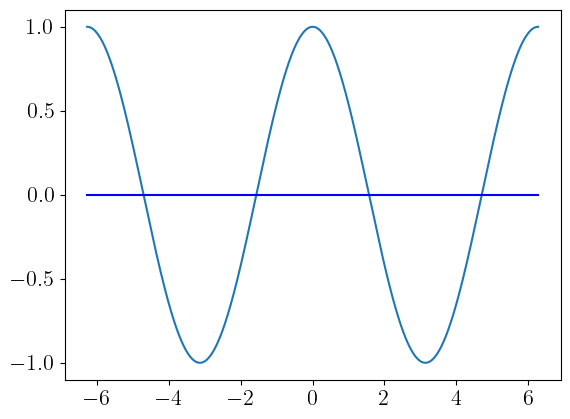

In [234]:
t_vals = np.linspace(-2*np.pi, 2*np.pi, 1000)
z_vals = np.cos(t_vals)

plt.plot(t_vals, z_vals)
# plt.plot(t_vals, np.real(np.emath.sqrt(z_vals)), 'k-')
# plt.plot(t_vals, np.imag(np.emath.sqrt(z_vals)), 'k--')
# plt.plot(t_vals, np.real(np.emath.sqrt(z_vals)**2), 'r--')

plt.plot(t_vals, continuous_angle(z_vals), 'b-')

# plt.plot(t_vals, np.real(continuous_sqrt(z_vals)), 'b-')
# plt.plot(t_vals, np.imag(continuous_sqrt(z_vals)), 'b--')
# plt.plot(t_vals, np.real(continuous_sqrt(z_vals)**2), '--', color='darkblue')
# # plt.plot(t_vals, np.imag(np.emath.sqrt(z_vals)**2), 'b--')

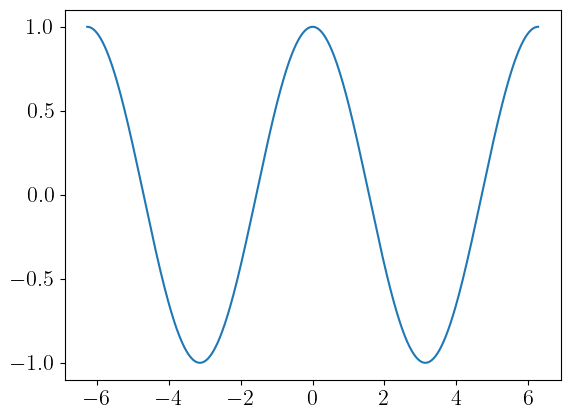

In [ ]:
z_vals

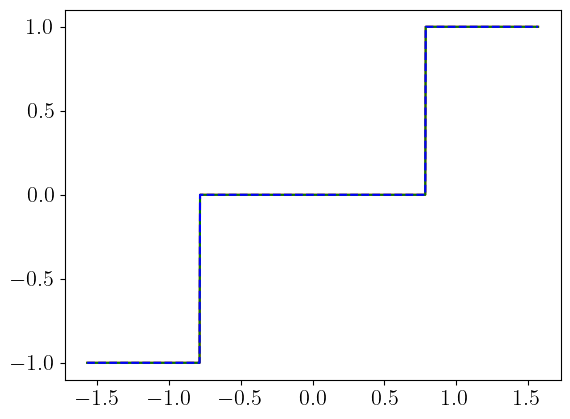

In [171]:
plt.plot(t, sigma_t_ex(t)/np.emath.sqrt(np.sign(B_ex(t))), 'r')
plt.plot(t, -sigma_t_ex(t)/sqrt_with_branch_cut(np.sign(B_ex(t)), branch_cut_dir=np.pi/2), 'g')
plt.plot(t, sigma_t_piecewise(t) * one_over_sgn_B(t), 'b--')

In [149]:
t = np.linspace(-np.pi/2, np.pi/2, 1000)

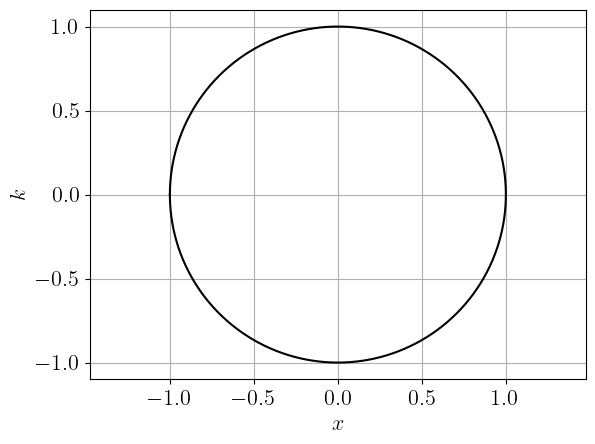

In [123]:
plt.axis('equal')
plt.plot(xs_ex(t), ks_ex(t), 'k-')
plt.xlabel(r'$x$')
plt.ylabel(r'$k$')
plt.grid()
plt.show()

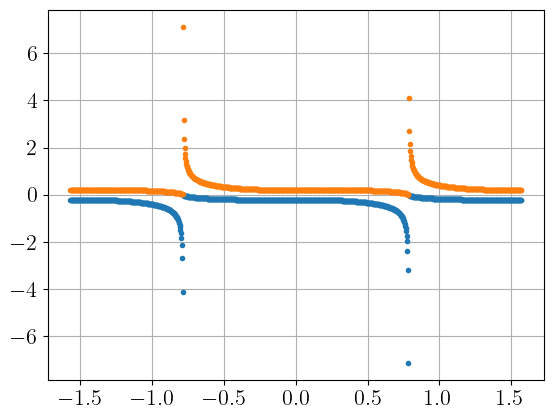

In [124]:
plt.plot(t, np.real(Nt_piecewise(t)), '.')
plt.plot(t, np.imag(Nt_piecewise(t)), '.')
plt.grid()

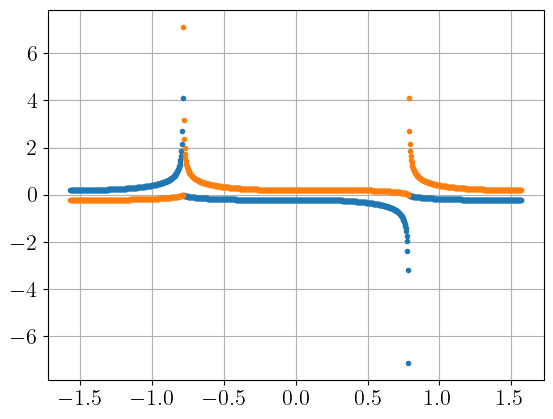

In [126]:
plt.plot(t, np.real(Nt_ex(t)), '.')
plt.plot(t, np.imag(Nt_ex(t)), '.')
plt.grid()

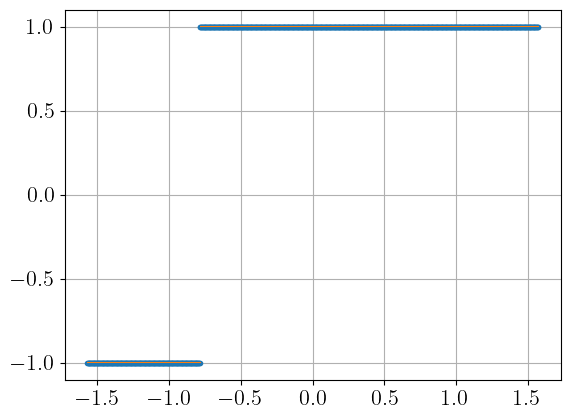

In [92]:
plt.plot(t, np.real(sigma_t_piecewise(t)), '.')
plt.plot(t, np.real(sigma_t_ex(t)), ',')
plt.grid()